## Code explained 



 ### Dataset Scraping And Cleaning
 
For our project we decided to scrape data of european football transfermarket from the specialized site called Transfermakt. At first we thought to scrape data about last transfers, but at the end we decided to scrape multiple years in order to perform also time analysis, taking into consideration the pandemic effect.
So, our dataset contains the top 625 transfers for player market value (assessed by transfermarkt) for years from 2018 to 2023. The code for the scraping however it is not present in this part since it would make everything more difficult. We will provide another file in which it is present the scraping code and the correspondent explanation.

Below we import the scraped datasets, one per each year, and we show the data cleaning process. It is important to highlight that before proceeding in the next steps we added in excel the year to each row of the datasets. It was much easier and fast to do it as soon as we visualised the datasets for the first time.

In [330]:
import pandas as pd 

In [331]:
df1=pd.read_csv('transfer_window2018.csv', sep=',')
df2=pd.read_csv('transfer_window2019.csv', sep=',')
df3=pd.read_csv('transfer_window2020.csv', sep=',')
df4=pd.read_csv('transfer_window2021.csv', sep=',')
df5=pd.read_csv('transfer_window2022.csv', sep=',')

# we create a list with all the 5 datasets
frames=[df1,df2,df3,df4,df5]
     
# we concatenate the dataframes inside the list in order to make a unique dataframe
df=pd.concat(frames)
# we create a new column with the new index
df.reset_index(inplace=True)
# we create a new column with the new index
df= df.iloc[: , 2:]
df

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,year
0,Kylian Mbappé,Centre-Forward,19,120000000,Monaco,Ligue 1,AS Monaco,France,Ligue 1,Paris Saint-Germain,180000000,2018
1,Cristiano Ronaldo,Centre-Forward,33,100000000,Spain,LaLiga,Real Madrid,Italy,Serie A,Juventus FC,117000000,2018
2,Kepa Arrizabalaga,Goalkeeper,23,20000000,Spain,LaLiga,Athletic Bilbao,England,Premier League,Chelsea FC,80000000,2018
3,Thomas Lemar,Attacking Midfield,22,65000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Atlético de Madrid,72000000,2018
4,Riyad Mahrez,Right Winger,27,50000000,England,Premier League,Leicester City,England,Premier League,Manchester City,67000000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
2970,Pedro Raul,Centre-Forward,26,6000000,Japan,J1 League,Kashiwa Reysol,Brazil,Carioca - Taça Guanabara,Clube de Regatas Vasco da Gama,1000000,2022
2971,Daniel Wass,Right-Back,33,6000000,Spain,LaLiga,Atlético de Madrid,Denmark,Superligaen,Bröndby IF,1000000,2022
2972,Amadou Diawara,Defensive Midfield,25,6000000,Italy,Serie A,AS Roma,Belgium,Jupiler Pro League,RSC Anderlecht,1000000,2022
2973,Marc Bartra,Centre-Back,31,6000000,Spain,LaLiga,Real Betis Balompié,Turkey,Süper Lig,Trabzonspor,1000000,2022


In [332]:
# we drop the row 144 because the player corresponding to this row is dead some of the data contains symbols
df = df.drop(index=df.iloc[144].name)
# here we show the first few rows of the final dataset 
df.head()

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,year
0,Kylian Mbappé,Centre-Forward,19,120000000,Monaco,Ligue 1,AS Monaco,France,Ligue 1,Paris Saint-Germain,180000000,2018
1,Cristiano Ronaldo,Centre-Forward,33,100000000,Spain,LaLiga,Real Madrid,Italy,Serie A,Juventus FC,117000000,2018
2,Kepa Arrizabalaga,Goalkeeper,23,20000000,Spain,LaLiga,Athletic Bilbao,England,Premier League,Chelsea FC,80000000,2018
3,Thomas Lemar,Attacking Midfield,22,65000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Atlético de Madrid,72000000,2018
4,Riyad Mahrez,Right Winger,27,50000000,England,Premier League,Leicester City,England,Premier League,Manchester City,67000000,2018


Next we will create a new column containing the general role for each player.

In [333]:
# we create an empty list to append the role of each player
# practically we will go through each row and we will append the general role.
# At the end we will just take the list with all the general positions and we will add it to the dataframe.
general_position=[]

# we specify to which general position the specific positions belong
defense=['Right-Back','Left-Back','Centre-Back']
midfield=['Central Midfield','Defensive Midfield','Right Midfield','Left Midfield','Attacking Midfield']
attack=['Second Striker','Centre-Forward','Left Winger','Right Winger']

# we create a for loop that iterates through alle the rows 
for index, row in df.iterrows():
    # we access the specific position and we assign that it to 'value'
    value = row['position']

    # we go through the different lists, if the value is not in one of them it means that the player must be a goalkeeper
    if value in defense:
        value='Defense'
    if value in midfield:
        value='Midfield' 
    if value in attack:
        value='Attack'
    if value=='Goalkeeper':
        pass
    general_position.append(value)

# we create a new column 'General_Position' amd we fill it with the values in the list general_position 
df['General_Position']=general_position
#df


### Dataset description
 Below it is present a brief description for each variable to understand what it represents:
 
- **name** : name and surname of the player;
 
- **position**: specific position of the player, with 13 possible values: GOALKEEPER, RIGHT-BACK, CENTRE-BACK, LEFT-BACK, RIGHT MIDFIELD, CENTRAL MIDFIELD, LEFT MIDFIELD, DEFENSIVE MIDFIELD, ATTACKING MIDFIELD, SECOND STRIKER, LEFT WINGER, RIGHT WINGER, CENTRE- FORWARD;

- **age**: age of the player, measured in years;

- **market_value**: market value of the player, measured in euros.

- **country_from**: country of the club which sold the player.

- **league_from**: league of the club which sold the player.

- **club_from**: club which sold the player.

- **country_to**: country of the club which bought the player.

- **league_to**: league of the club which bought the player.

- **club_to**: club which bought the player.

- **fee**: the amount of money payed for the trasfer the player, measured in euros.

- **year**: year of the transfer, with 5 possible values: 2018, 2019, 2020, 2021, 2022, 2023.

The following column will be added in the next part of the code:

- **General_Position**: general position of the player, with 4 possible values: GOALKEEPER, DEFENSE, MIDFIELD, ATTACK.
 

Since we want to focus the attention of the top 5 ligues of the world and we do not really care about all the other little leagues we reassign the league_from values of the players that have a league different from the top 5 into 'Others'.

In [334]:
# we create a list with the name of the 5 top leagues for which we want to keep the name
lst=['Premier League', 'Ligue 1','Bundesliga','Serie A', "LaLiga"]
# we create a new list to append all the names as done before
league_from=[]
for index,row in df.iterrows():
    if row['league_from'] not in lst:
       league_from.append('Others')
    else:
       league_from.append(row['league_from']) 

# we overwrite the values of league_from with now 'Others' instead of the name of a minor league
df['league_from']=league_from
#df


We do the same also for league_to.

In [335]:
league_to=[]
for index,row in df.iterrows():
    if row['league_to'] not in lst:
       league_to.append('Others')
    else:
       league_to.append(row['league_to']) 

    
df['league_to']=league_to


In the next lines of code we will replace on the right the wrong values present in the datasets with the correct ones, which are the ones on the right insight the function 'replace(left,right)'.

In [336]:
df['fee'] = df['fee'].str.replace('k','000')
df['fee'] = df['fee'].str.replace('free transfer','0')
df['fee'] = df['fee'].str.replace('loan transfer','0')
df['fee'] = df['fee'].str.replace('?','0')

C:\Users\ElDorado601\AppData\Local\Temp\ipykernel_17916\4287807619.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



For this variable there were some problems in the format for the year 2021, therefore it was necessary to convert the whole clomn into string and then it was possible to apply the tranformations. Othersie, ti would have cancelled the values.

In [337]:
df["market_value"]=df["market_value"].astype(str)
df['market_value'] = df['market_value'].str.replace('k','000')

Here we tranform the type of fee and agent from string into integer.

In [338]:
df['fee']=df['fee'].astype('int')
df['age']=df['age'].astype('int')

Since for some players for the market value was present '-' to indicate a null value, we replace '-' with the market value of the same player. It seemed the best way to imputate.

In [339]:
# we iterate over each row to find the ones with '-' and replace it with the the player 'fee'
for idx, row in df.iterrows():
    if row['market_value'] == '-':
        df.loc[idx, 'market_value'] = row['fee']

We just check for null values and duplicates

In [340]:
print("NaNs:")
display(df.isnull().sum())
print("\n\nDuplicates:")
display(df.duplicated().sum())

NaNs:


name                0
position            0
age                 0
market_value        0
country_from        0
league_from         0
club_from           0
country_to          0
league_to           0
club_to             0
fee                 0
year                0
General_Position    0
dtype: int64



Duplicates:


20

Finally we drop the 20 duplicates we have.

In [341]:
df=df.drop_duplicates()
# we create a new column with the new index
df.reset_index(inplace=True)
# we create a new dataframe to eliminate the double index
df

,index,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,year,General_Position
0,0,Kylian Mbappé,Centre-Forward,19,120000000,Monaco,Ligue 1,AS Monaco,France,Ligue 1,Paris Saint-Germain,180000000,2018,Attack
1,1,Cristiano Ronaldo,Centre-Forward,33,100000000,Spain,LaLiga,Real Madrid,Italy,Serie A,Juventus FC,117000000,2018,Attack
2,2,Kepa Arrizabalaga,Goalkeeper,23,20000000,Spain,LaLiga,Athletic Bilbao,England,Premier League,Chelsea FC,80000000,2018,Goalkeeper
3,3,Thomas Lemar,Attacking Midfield,22,65000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Atlético de Madrid,72000000,2018,Midfield
4,4,Riyad Mahrez,Right Winger,27,50000000,England,Premier League,Leicester City,England,Premier League,Manchester City,67000000,2018,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2970,Pedro Raul,Centre-Forward,26,6000000,Japan,Others,Kashiwa Reysol,Brazil,Others,Clube de Regatas Vasco da Gama,1000000,2022,Attack
2950,2971,Daniel Wass,Right-Back,33,6000000,Spain,LaLiga,Atlético de Madrid,Denmark,Others,Bröndby IF,1000000,2022,Defense
2951,2972,Amadou Diawara,Defensive Midfield,25,6000000,Italy,Serie A,AS Roma,Belgium,Others,RSC Anderlecht,1000000,2022,Midfield
2952,2973,Marc Bartra,Centre-Back,31,6000000,Spain,LaLiga,Real Betis Balompié,Turkey,Others,Trabzonspor,1000000,2022,Defense


In [342]:
print("NaNs:")
display(df.isnull().sum())
print("\n\nDuplicates:")
display(df.duplicated().sum())

NaNs:


index               0
name                0
position            0
age                 0
market_value        0
country_from        0
league_from         0
club_from           0
country_to          0
league_to           0
club_to             0
fee                 0
year                0
General_Position    0
dtype: int64



Duplicates:


0

Then, we convert and save df into a csv file to be used again and again for the analyses

In [343]:
# we drop the old index
df= df.iloc[: , 1:]
df

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,year,General_Position
0,Kylian Mbappé,Centre-Forward,19,120000000,Monaco,Ligue 1,AS Monaco,France,Ligue 1,Paris Saint-Germain,180000000,2018,Attack
1,Cristiano Ronaldo,Centre-Forward,33,100000000,Spain,LaLiga,Real Madrid,Italy,Serie A,Juventus FC,117000000,2018,Attack
2,Kepa Arrizabalaga,Goalkeeper,23,20000000,Spain,LaLiga,Athletic Bilbao,England,Premier League,Chelsea FC,80000000,2018,Goalkeeper
3,Thomas Lemar,Attacking Midfield,22,65000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Atlético de Madrid,72000000,2018,Midfield
4,Riyad Mahrez,Right Winger,27,50000000,England,Premier League,Leicester City,England,Premier League,Manchester City,67000000,2018,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,Pedro Raul,Centre-Forward,26,6000000,Japan,Others,Kashiwa Reysol,Brazil,Others,Clube de Regatas Vasco da Gama,1000000,2022,Attack
2950,Daniel Wass,Right-Back,33,6000000,Spain,LaLiga,Atlético de Madrid,Denmark,Others,Bröndby IF,1000000,2022,Defense
2951,Amadou Diawara,Defensive Midfield,25,6000000,Italy,Serie A,AS Roma,Belgium,Others,RSC Anderlecht,1000000,2022,Midfield
2952,Marc Bartra,Centre-Back,31,6000000,Spain,LaLiga,Real Betis Balompié,Turkey,Others,Trabzonspor,1000000,2022,Defense


In [344]:
df.to_csv('transfer_window.csv')

It is important to notice that once the dataset will be reimported it iwll present a double index, the first of the orinal dataset and the one from the import.

### Exploratory Analysis and our story

The first thing we want to know is how much each different league has spent and earned from the transfermaket. So, our first visualization will be a two barchart grouped by league. Furthermore, to provide an easier association between color of the bars and corresponding League we assign each color according to the color present in the logo of the League, or in case of multiple colors to the color that is usually associated to it.
These are the list of leagues and the corresponding codified color:
- Premier League = "#031b5e"
- Serie A='#25AA0A'
- LaLiga="#E16B19"
- Ligue 1='#7e33c5'
- Bundesliga="#ca0302"
- Others='lightgrey'

In [345]:
# groupby league_to and calculate the summation of the fee for each
league=df.groupby('league_to', as_index=False)['fee'].sum()
# rearrenge in ascending order for fee spent
league=league.sort_values(by=['fee'], ascending=False)

import plotly.express as px
import plotly.graph_objects as go

# we create the list with the colors of each league to macth the corresponding bar of the chart.
# This is the corresponding order:
#  Premier League, Serie A,   Others,     LaLiga,    Ligue 1,  Bundesliga
color=["#031b5e",'#25AA0A', 'lightgrey', "#E16B19", '#7e33c5',"#ca0302" ]


fig = go.Figure(data= [go.Bar(x=league["league_to"], y=league["fee"], marker_color=color)])
fig.show()

In [346]:
# leagues with ascending order of fee earnt
league_from=df.groupby('league_from', as_index=False)['fee'].sum()
# rearrenge in ascending order for fee spent
league_from=league_from.sort_values(by=['fee'], ascending=False)

# Again, we create the list with the colors of each league to macth the corresponding bar of the chart.
# This is the corresponding order:
#        Others,    Serie A, Premier League, Ligue 1, LaLiga,  Bundesliga
color2=['lightgrey','#25AA0A',"#031b5e", '#7e33c5', '#E16B19', "#ca0302" ]

fig = go.Figure(data= [go.Bar(x=league_from["league_from"], y=league["fee"], marker_color=color2)])
fig.show()

The next thing we want to visualize is the top 20 club for expenditures and we plot it together with their revenues

In [347]:
#data preparation club two sided barchart

# we create 2 temporary dataframe containing only the money spent and earnt of the 20 teams with highest spending

# club_to corresponds to the club that paid for the player
# so we grouby club_to and we calculate the summation for each club of the expenditures
in_transfer=df.groupby(by=["club_to"]).sum(['fee'])
# rename fee into expenditure
in_transfer=in_transfer.rename(columns={"fee": "expenditure"})
# we assign the id of the player the new index of the dataframe
in_transfer['id']=in_transfer.index

# same of above, but for the earnings of each club
out_transfer=df.groupby(by=["club_from"]).sum(['fee'])
out_transfer['id']=out_transfer.index
out_transfer=out_transfer.rename(columns={"fee": "revenue"})

# here we create a new dataset through an inner join on 'id' for the two df we made 
balance=out_transfer.merge(in_transfer, how='inner', on='id')
# we specify the names of the columns
balance=balance.loc[:,['id', 'revenue','expenditure']]
# we tranform all the values of expenditure in negative in order to plot them later
balance['expenditure'] = balance['expenditure']*(-1)

# we ordered by expenditure the whole dataframe
balance=balance.sort_values(by=['expenditure'])
# we create a new dataset with only the 20 teams wiht highest expenditure
balance_20=balance.head(20)

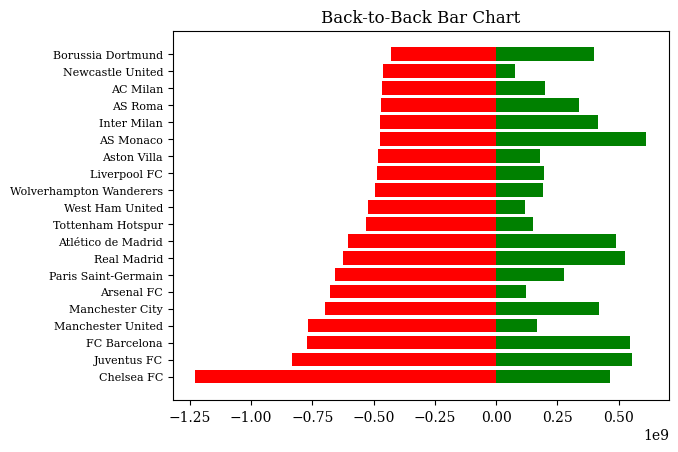

In [348]:
# plot the bars
import matplotlib.pyplot as plt

plt.barh(balance_20['id'], balance_20['revenue'], color = 'g')
plt.barh(balance_20['id'], balance_20['expenditure'], color = 'r')
plt.title("Back-to-Back Bar Chart")
plt.yticks(fontsize=8)
plt.show()

The last representation of this part concerns the top transfers for fee among these years plotted together with the respective 
league in a sankey diagram.


In [349]:
# Import the sankey function from the sankey module within pySankey
# !pip install pySankey
from pySankey.sankey import sankey

In [350]:
df

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,year,General_Position
0,Kylian Mbappé,Centre-Forward,19,120000000,Monaco,Ligue 1,AS Monaco,France,Ligue 1,Paris Saint-Germain,180000000,2018,Attack
1,Cristiano Ronaldo,Centre-Forward,33,100000000,Spain,LaLiga,Real Madrid,Italy,Serie A,Juventus FC,117000000,2018,Attack
2,Kepa Arrizabalaga,Goalkeeper,23,20000000,Spain,LaLiga,Athletic Bilbao,England,Premier League,Chelsea FC,80000000,2018,Goalkeeper
3,Thomas Lemar,Attacking Midfield,22,65000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Atlético de Madrid,72000000,2018,Midfield
4,Riyad Mahrez,Right Winger,27,50000000,England,Premier League,Leicester City,England,Premier League,Manchester City,67000000,2018,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,Pedro Raul,Centre-Forward,26,6000000,Japan,Others,Kashiwa Reysol,Brazil,Others,Clube de Regatas Vasco da Gama,1000000,2022,Attack
2950,Daniel Wass,Right-Back,33,6000000,Spain,LaLiga,Atlético de Madrid,Denmark,Others,Bröndby IF,1000000,2022,Defense
2951,Amadou Diawara,Defensive Midfield,25,6000000,Italy,Serie A,AS Roma,Belgium,Others,RSC Anderlecht,1000000,2022,Midfield
2952,Marc Bartra,Centre-Back,31,6000000,Spain,LaLiga,Real Betis Balompié,Turkey,Others,Trabzonspor,1000000,2022,Defense


In [351]:
# we create a new datafram that is just df but sorted for highest fee
df_sorted=df.sort_values(by=['fee'], ascending=False)
# we create a new dataset with only the first 30 rows of the former dataset, which are the 30 most paid players
df_top=df_sorted.head(30)

In [352]:
#create a color dictionary for both leagues and players making match the colors
league_color={
    "Bundesliga": "#ca0302",
    "LaLiga": "#E16B19",
    "Premier League": "#031b5e",
    "Serie A":'#25AA0A',
    'Ligue 1':'#7e33c5'
    }

# add to the dataframe a column containing the color of the player according to the league in which he went
for index,row in df_top.iterrows():
    league=row['league_to']
    color=league_color[league]
    key=row['name']
    league_color[key]=color

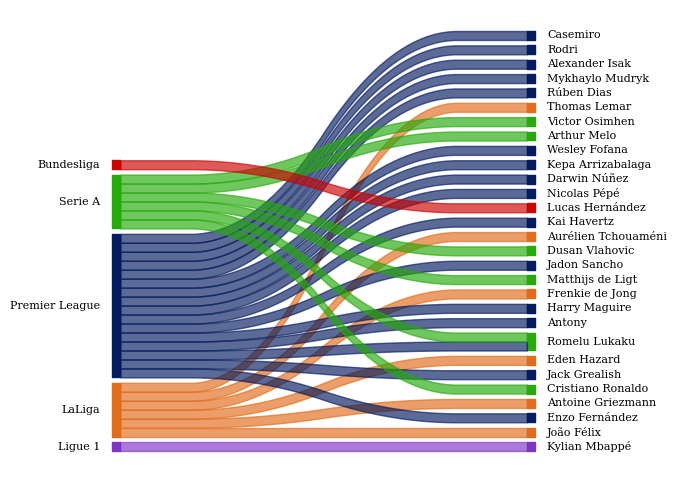

In [353]:
# here we plot the sankey graph showing in which league each of the top 30 players went
sankey(df_top['league_to'], df_top["name"], colorDict=league_color, fontsize=8)

### Covid Effect - Interactive Chart

In order to get covid drawbacks on the european market we decided to investigate two aspects: the first one is quite intuitive and it consists in looking at the total expenditures for league during the years; the second, instead, regards the zero fee transfers. The pandemic had huge consequences in terms of revenues.

To do it we have implemented a dashboard featuring 2 different connected charts: a stacked bar chart representing the amount of money spent by year by each league, and a pie chart showing the ratio between players paid and taken at zero. The two graphs are connected through linking and brushing and selecting a bar of the barchart the pie chart will automatically show the ratio of the year of the bar selected.

In [354]:
# here we import all the packages needed for the realisation of the dash 
import pandas as pd 
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import visdcc
import plotly.graph_objects as go

In [397]:
# we initialize the dash
app = Dash(__name__)

# DATA PROCESSING

# first we create a new dataframe that groups the orignal dataset for league and year and we
# calculate the total expenditures made by each league.
league_year=df.groupby(['league_to', 'year'], as_index=False)['fee'].sum()

# Then, we create a dataset for each of the leagues we have plus one for the 'Others'
premier=league_year[league_year['league_to']=="Premier League"]
serieA=league_year[league_year['league_to']=="Serie A"]
bundesliga=league_year[league_year['league_to']=="Bundesliga"]
laliga=league_year[league_year['league_to']=="LaLiga"]
ligue1=league_year[league_year['league_to']=="Ligue 1"]
others=league_year[league_year['league_to']=="Others"]

################################################################################################################################

# DASH LAYOUT 

# Here we create the layout to show the charts on the dashboard

# the layout foresees one row with two different columns, in one will be shown te barchart and in the other the pie chart.
app.layout = html.Div(className='row',style={'display': 'flex',  'fontSize': 14}, children=[
        html.Div([
        dcc.Graph(id = 'bar_plot')
        ],  style={'width':'100%'},
        className='two columns'),
        html.Div([
        dcc.Graph(id = 'pie_chart')],style={'width':'100%'},className='two columns')])

################################################################################################################################

# CALLBACKS

# In the first callback we create function to create the barchart
    
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
             Input(component_id='bar_plot', component_property='selectedData'))

def graph_update(selectedData):
    fig_stacked_bar = go.Figure(data= [go.Bar(name='Premier League',x=premier["year"], y=premier["fee"], marker_color='#031b5e'),
                      go.Bar(name='Serie A',x=serieA["year"], y=serieA["fee"], marker_color='#25AA0A'),
                      go.Bar(name='Bundesliga',x=bundesliga["year"], y=bundesliga["fee"], marker_color='#ca0302'),
                      go.Bar(name='LaLiga',x=laliga["year"], y=laliga["fee"], marker_color='#E16B19'),
                      go.Bar(name='Ligue 1',x=ligue1["year"], y=ligue1["fee"], marker_color='#7e33c5'),
                      go.Bar(name='Others',x=others["year"], y=others["fee"], marker_color='lightgrey')])

    fig_stacked_bar.update_layout(barmode='stack')
    

    return fig_stacked_bar

# In the second callback we create the function to create the pie chart
@app.callback(
    Output(component_id='pie_chart', component_property='figure'),
    Input(component_id='bar_plot', component_property='hoverData'),
    Input(component_id='bar_plot', component_property='clickData'),
    Input(component_id='bar_plot', component_property='selectedData'))

def update_side_graph(hov_data, clk_data, slct_data):
    
    if clk_data is None:
        # we set the value shown when nothing is clicked
        fig_pie=px.pie(values=[760,2974], names=['zero', 'non-zero'], title='Percentage of zero transfers', 
                       color_discrete_map = 'viridis')
        # we specify the features that must be shown when hoovering on the different parts of the pie chart
        fig_pie.update_traces(hoverinfo = 'label+percent', textfont_size = 20,
                  textinfo = 'label+percent', pull = [0.1, 0, 0.2, 0, 0, 0])

        return fig_pie
    
    else:
        # here instead what happens when a bar is selected
        
        #print(clk_data['points'][0]['x'])
        #print(clk_data)
        # print(f'click data: {clk_data}')
        # print(f'selected data: {slct_data}')
        
        year=clk_data['points'][0]['x']
        
        df2=df[df['year']==year]
        tot=len(df2)
        zero=len(df2[df2['fee']==0])
        
        fig_pie=px.pie(values=[zero,tot-zero], names=['zero', 'non-zero'], title=f'Percentage of zero transfers in {year}', 
                       color_discrete_map = 'viridis')

        fig_pie.update_traces(hoverinfo = 'label+percent', textfont_size = 20,
                  textinfo = 'label+percent', pull = [0.1, 0, 0.2, 0, 0, 0])


        return fig_pie


if __name__ == '__main__': 
    app.run_server(port=127)

Dash is running on http://127.0.0.1:127/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:127/ (Press CTRL+C to quit)
127.0.0.1 - - [06/May/2023 16:16:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2023 16:16:35] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2023 16:16:35] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2023 16:16:35] "GET /_favicon.ico?v=2.9.2 HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2023 16:16:35] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2023 16:16:35] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2023 16:16:35] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2023 16:16:35] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2023 16:16:35] "POST /_dash-update-component HTTP/1.1" 200 -


### Premier League interactions

In the next part we wanted to deepen our study through network analyses and map visualizations. 

The first visualization is a cloropleth map, which through colors manages to clearly show from where the clubs of Premier League buy their players. The color gradient is associated, in fact, to the number of players that Premier League bought from each of the colored countries. The grey ones did not sell any players to Premier Leagues during the time frame 2018 to 2022.
We thought also about doing a flow map instead of this, however it would have been less understandable how many transfers would have been from the Premier League towards the Premier League. Through cloropleth graph this instead is very clear.

In [383]:
import pycountry

# we create a dictionary where we will store the new rows of the datasets that will be updated with more values we 
# will create in the next lines 
d={}

# we create an empty dictionary that will be populated with all countries name codified according to alpha_3 type.
# this is necessary because later we will use this code to match the name of the countries in our dataset with the
# ones of the library that will localise them on the map
countries = {}

# we iterate for each country in the pycountry library to populate the dictionary
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

# for each row of our dataset 
for index,row in df.iterrows():
    # we extract the value of country_to of the row and we assign it to this temporary variable
    country_to=row['country_to']
    # we assign the alpha_3 code of the country to the country of each specific row
    # Since in our dataset UK is codified as 'England' and in the library it UK codified as 'United Kingdom' we set that
    # if there is no match for the name of the country it automatically assigned'GBR'. This is becuse all the other names
    # of the country matches and therefore, the only optios is that the player belong to UK.
    code_to = countries.get(country_to ,'GBR')
    # we add a new column per each row containing the alpha_3 name of the country
    row['code_to']=code_to
    # we do the same process for country_from 
    country_from=row['country_from']
    code_from = countries.get(country_from ,'GBR')
    row['code_from']=code_from
    # we populate d to later convert it in the dataset for the chart
    d[index]=row

# we convert the dictioary in a dataframe 
df=pd.DataFrame.from_dict(d, orient='index')
# we isolate for the players that goes in Premier League
premier_league = df[df['league_to']=='Premier League']
# we create a dataframe grouped by the code of the country and which counts the number of players going in Premier League
color_map=df.groupby(['code_from'])['age'].count().reset_index(name="count")


In [394]:
# here we invert the gradient scale in order to have lighter color for small count of players from a country,
# and intense color for am high count 
color_continuous_scale=px.colors.sequential.Plasma[::-1]

fig = px.choropleth(color_map, locations="code_from",
                    color='count', 
                    color_continuous_scale=color_continuous_scale)
fig.update_layout(autosize=True)
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),showlegend=False)
fig.show()
fig.write_html("raph5.html")

# Interactive Graph Visualization - Cytoscape

In [400]:
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import dash
import dash_cytoscape as cyto
from jupyter_dash import JupyterDash
# Load extra layouts
cyto.load_extra_layouts()
import json
from dash import dcc, html, ctx
# Note that older versions of Dash need to import dcc and html in a different way.
# If you have an older version of Dash, please comment this import and uncomment the following two lines of code
#import dash_core_components as dcc
#import dash_html_components as html
from dash.dependencies import Input, Output
import networkx as nx


In [419]:
df=pd.read_csv('transfer_window.csv', sep=',')

In [420]:
# here we rename the columns club_form and club_to
df=df.rename(columns={"club_from": "from", "club_to": "to"})

# then, se downsize it to only the players that went to Premier League
df=df[df['league_to']=="Premier League"]

# then we sort for ascending market value
df=df.sort_values(by=['market_value'], ascending=False)

# and we select just the first 100
df=df.head(100)
df

,Unnamed: 0,name,position,age,market_value,country_from,league_from,from,country_to,league_to,to,fee,year,General_Position
2332,2332,Erling Haaland,Centre-Forward,21,150000000,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60000000,2022,Attack
1859,1859,Romelu Lukaku,Centre-Forward,28,100000000,Italy,Serie A,Inter Milan,England,Premier League,Chelsea FC,113000000,2021,Attack
1860,1860,Jadon Sancho,Left Winger,21,100000000,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester United,85000000,2021,Attack
1233,1233,Kai Havertz,Attacking Midfield,21,81000000,Germany,Bundesliga,Bayer 04 Leverkusen,England,Premier League,Chelsea FC,80000000,2020,Midfield
625,625,Rodri,Defensive Midfield,23,80000000,Spain,LaLiga,Atlético de Madrid,England,Premier League,Manchester City,70000000,2019,Midfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1246,Nathan Aké,Centre-Back,25,28000000,England,Others,AFC Bournemouth,England,Premier League,Manchester City,45000000,2020,Defense
701,701,Patrick Cutrone,Centre-Forward,21,28000000,Italy,Serie A,AC Milan,England,Premier League,Wolverhampton Wanderers,18000000,2019,Attack
2408,2408,Leander Dendoncker,Defensive Midfield,27,28000000,England,Premier League,Wolverhampton Wanderers,England,Premier League,Aston Villa,15000000,2022,Midfield
1277,1277,Gareth Bale,Right Winger,31,28000000,Spain,LaLiga,Real Madrid,England,Premier League,Tottenham Hotspur,0,2020,Attack


In [427]:
# we create a dictionary containing the name of the club and the league to which it belongs
# we will use this information later for the classes in cytoscape
league_from={}
for index,row in df.iterrows():
    if row['from'] not in league_from.keys():
        league_from[row['from']]=row['league_from']

for index,row in df.iterrows():
    if row['to'] not in league_from.keys():
        league_from[row['to']]=row['league_to']
        
#league_from

In [417]:
# We create the graph specifying from which club to which club the player goes. It is in this regard that later will come handy
# the dictionary made above, to associate from which league to which league the player went.
G=nx.from_pandas_edgelist(df, source='from', target='to')

# we import and use the community louvain algorithm to cluster our nodes together
from community import community_louvain
part=community_louvain.best_partition(G)
# part
# max(part.values())+1

In [418]:
# we add attributes to each node.
# through this function the program iterates through all the nodes and associate to each node the corresponding league
# and number of community in which it is
nx.set_node_attributes(G, league_from, "league_from")
nx.set_node_attributes(G, part, "community")

# then we set the data to be processed with cytoscape
data=nx.cytoscape_data(G)
data

{'data': [],
 'directed': False,
 'multigraph': False,
 'elements': {'nodes': [{'data': {'league_from': 'Bundesliga',
     'community': 2,
     'id': 'Borussia Dortmund',
     'value': 'Borussia Dortmund',
     'name': 'Borussia Dortmund'}},
   {'data': {'league_from': 'Premier League',
     'community': 1,
     'id': 'Manchester City',
     'value': 'Manchester City',
     'name': 'Manchester City'}},
   {'data': {'league_from': 'Serie A',
     'community': 2,
     'id': 'Inter Milan',
     'value': 'Inter Milan',
     'name': 'Inter Milan'}},
   {'data': {'league_from': 'Premier League',
     'community': 2,
     'id': 'Chelsea FC',
     'value': 'Chelsea FC',
     'name': 'Chelsea FC'}},
   {'data': {'league_from': 'Premier League',
     'community': 2,
     'id': 'Manchester United',
     'value': 'Manchester United',
     'name': 'Manchester United'}},
   {'data': {'league_from': 'Bundesliga',
     'community': 0,
     'id': 'Bayer 04 Leverkusen',
     'value': 'Bayer 04 Leverkuse

In [422]:
# we format the names of the leagues to have all the words concatenated without spaces, otherwise the program does not
# elaborate them correctly.
for el in data['elements']['nodes']:
    el['classes']=el['data']['league_from'].replace(' ','')


In [423]:
# we create a class that codifies together the league and the community to which the node belongs 
for el in data['elements']['nodes']:
    el['classes']=el['classes']+" "+str(el['data']['community'])
data

{'data': [],
 'directed': False,
 'multigraph': False,
 'elements': {'nodes': [{'data': {'league_from': 'Bundesliga',
     'community': 2,
     'id': 'Borussia Dortmund',
     'value': 'Borussia Dortmund',
     'name': 'Borussia Dortmund'},
    'classes': 'Bundesliga 2'},
   {'data': {'league_from': 'Premier League',
     'community': 1,
     'id': 'Manchester City',
     'value': 'Manchester City',
     'name': 'Manchester City'},
    'classes': 'PremierLeague 1'},
   {'data': {'league_from': 'Serie A',
     'community': 2,
     'id': 'Inter Milan',
     'value': 'Inter Milan',
     'name': 'Inter Milan'},
    'classes': 'SerieA 2'},
   {'data': {'league_from': 'Premier League',
     'community': 2,
     'id': 'Chelsea FC',
     'value': 'Chelsea FC',
     'name': 'Chelsea FC'},
    'classes': 'PremierLeague 2'},
   {'data': {'league_from': 'Premier League',
     'community': 2,
     'id': 'Manchester United',
     'value': 'Manchester United',
     'name': 'Manchester United'},
    '

Below it is contained the whole code for the cytoscape dashboard. 

In [429]:
cyto_id = 'cytoscape' # just the name of the plot

style = {'width': '100%', 'height': '800px'} # the size of the plot

# we initialize the dashboard application
app = JupyterDash(__name__)

# we set the layout of the dashboard

# it will contain 2 drop down menus

# the first will allow the user to decide which layout to visualize the nodes

# the second it will allow the user to select if the nodes should be colored according to the community louvain clusters color,
# or according to the league belonging of the node

app.layout = html.Div([dcc.Dropdown(
        # first drop down menu for the layout
        id='dropdown-update-layout',
        value='circle',
        clearable=False,
        options=[
            {'label': name.capitalize(), 'value': name}
            for name in ['circle', 'concentric', 'cose-bilkent']
        ]
    ),

    dcc.Dropdown(
        # second drop down menu for the color of the nodes
        id='dropdown-update-color',
        value='league',
        clearable=False,
        options=[
            {'label': name.capitalize(), 'value': name}
            for name in ['league', 'community']
        ]
    ),
    # here we specify the different features of the graph                   
    cyto.Cytoscape(id = cyto_id, # name of the plot
                   style = style,
                   layout = {'name': 'concentric'}, 
                   stylesheet=[
            # Group selectors
            {
                'selector': 'node',
                'style': {
                    'content': 'data(id)'
                }
            }
            ]
,
                   elements = data['elements'])] # lastly we specify the location of the elements of the cytoscape graph
    )

################################################################################################################################

# The first callback defines the color that each nodes has to be according to the choice of the user: by League or by community
# lauvain cluster

@app.callback(Output('cytoscape', 'stylesheet'),
              Input('dropdown-update-color', 'value'))

def update_layout(stylesheet):
    # here we tailor the features of the nodes and the edges
    
    # there are two options represented by the if we are going to make: 
    # the first is that the nodes need to be colored according to the league from which each player comes
    # the second is that the nodes need to be colored according to the community louvain cluster 
    
    
    # 1st if
    if stylesheet=='league':
        stylesheet=[
            # Group selectors
            {
                # we set that the label of each node coincide with the name of the CLub from which the player comes
                'selector': 'node',
                'style': {
                    'content': 'data(id)'
                }
            
            },
            
             {
                 # we specify the opacity of all edges in order to make the nodes and the labels easier to visualize
                'selector': 'edge',
                'style': {
                    'line-color': 'black',
                     'opacity': '0.2'
                }
             },


            # Class selectors
            # here we tailor the color of the node accordig to the League from which the player comes
            {
                'selector': '.LaLiga',
                'style': {
                    'background-color': '#E16B19',
                    'line-color': '#219ebc',
                    'shape': 'dot'
                }
            },
            {
                'selector': '.Others',
                'style': {
                    'background-color': 'lightgrey',
                    'line-color': '#219ebc',
                    'shape': 'dot'
                }
            },
    {
                'selector': '.PremierLeague',
                'style': {
                    'background-color': '#031b5e',
                    'line-color': '#219ebc',
                    'shape': 'dot'
                }
            },{
                'selector': '.Bundesliga',
                'style': {
                    'background-color': '#ca0302',
                    'line-color': '#219ebc',
                    'shape': 'dot'
                }
            },
    {
                'selector': '.SerieA',
                'style': {
                    'background-color': '#25AA0A',
                    'line-color': '#219ebc',
                    'shape': 'dot'
                }
            },
    {
                'selector': '.Ligue1',
                'style': {
                    'background-color': '#7e33c5',
                    'line-color': '#219ebc',
                    'shape': 'dot'
                }
            }
            
            
        ]


        return stylesheet
    
    
    
    # 2nd if 
    if stylesheet=='community':
        stylesheet=[
                    # Group selectors
                    {
                        'selector': 'node',
                        'style': {
                            'content': 'data(id)'
                        }
                    },
             {
                'selector': 'edge',
                'style': {
                    'line-color': 'black',
                    'opacity': '0.2'
                }
             }
                    ]
        # here we define that there must be created the same number of colors from the viridis palette as the number 
        # of clusters we have
        
        # we automised the process since the number of cluster individuated by community louvain algorithm can vary 
        # time by time
        palette = sns.color_palette("viridis", max(part.values())+1)

        for x in range(0,max(part.values())+1):
            # we convert x in a string and assign to y to avoid issues in the next steps
            y=str(x)
            color=matplotlib.colors.rgb2hex(palette[x])
            # it is colored the node according to the cluster
            selector={
                        'selector': f'.{y}',
                        'style': {
                            'background-color':f'{color}',
                            'shape': 'dot'
                        }
                    }
            stylesheet.append(selector)
            
        return stylesheet
    
    
########### Now we will go thorugh the callback connected to the second drop down menu, the one to choose layout ###########
    

@app.callback(Output('cytoscape', 'layout'),
              Input('dropdown-update-layout', 'value'))

    # here we make the layout match the one decided by the user
def update_layout(layout):
    if layout=='circle':
        return {
            'name': layout,
            'animate': True,
            
        }
    if layout=='cose-bilkent':
        return {
            'name': layout,
            'animate': True,
            # below we specify the metric to give more distance between nodes and make it easier to visualize
            'idealEdgeLength': 200
        }
    if layout=='concentric':
        return {
            'name': layout,
            'animate': True,
            # below we specify the metric to give more distance between nodes and make it easier to visualize
            'minNodeSpacing': 70
        }

    
if __name__ == '__main__':
    app.run_server(mode='inline', debug=False, port=550)



Dash is running on http://127.0.0.1:550/



 * Running on http://127.0.0.1:550/ (Press CTRL+C to quit)


OSError: Address 'http://127.0.0.1:550' already in use.
    Try passing a different port to run_server.